In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
import pickle

In [8]:
# Data Ingestion Step
df = pd.read_csv('data\gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
df.shape

(193573, 11)

In [11]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [16]:
df.drop('id', inplace=True, axis = 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [18]:
df.duplicated().sum()

0

In [22]:
# Segregating numerical and categorical columns
num_columns = df.columns[df.dtypes != 'object']
cat_columns = df.columns[df.dtypes == 'object']
print(f"Numerical Columns: {list(num_columns)}", f"Numerical Columns: {list(cat_columns)}", sep='\n')

Numerical Columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Numerical Columns: ['cut', 'color', 'clarity']


In [23]:
df[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [24]:
df[cat_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [25]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [26]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [27]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

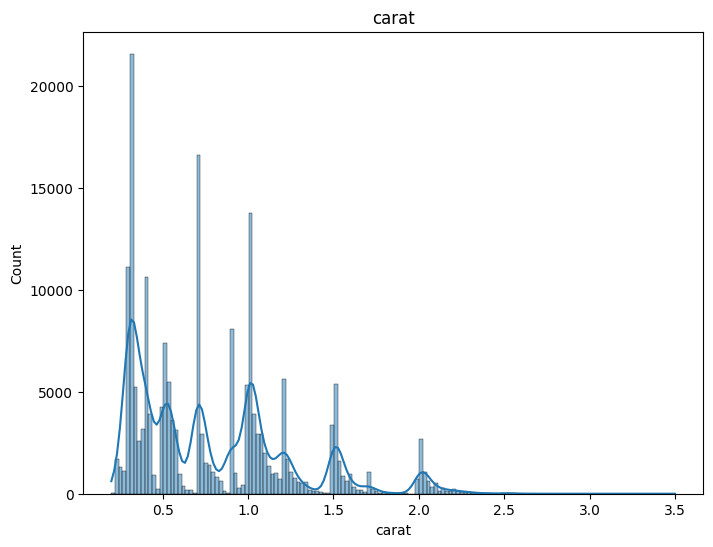

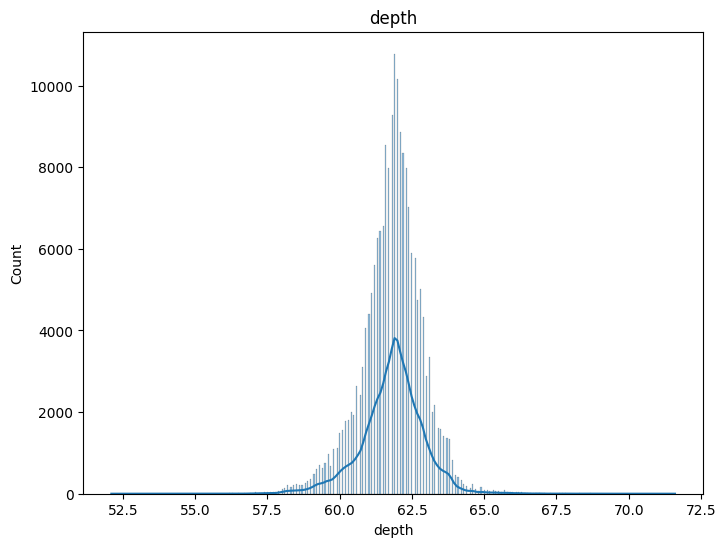

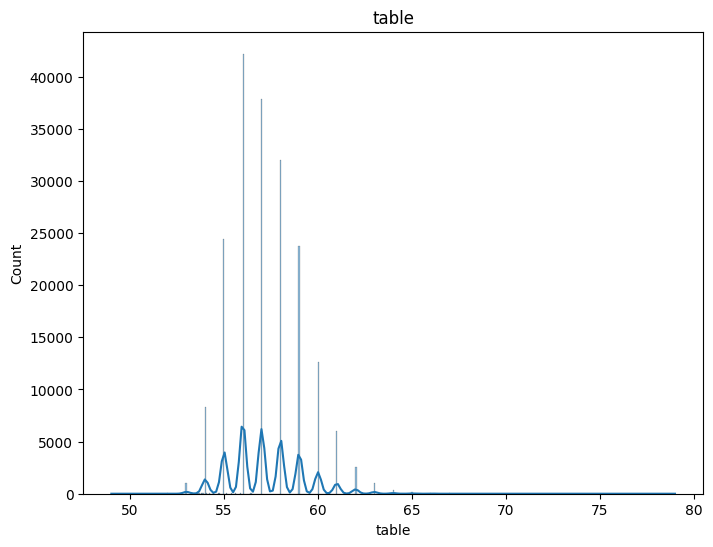

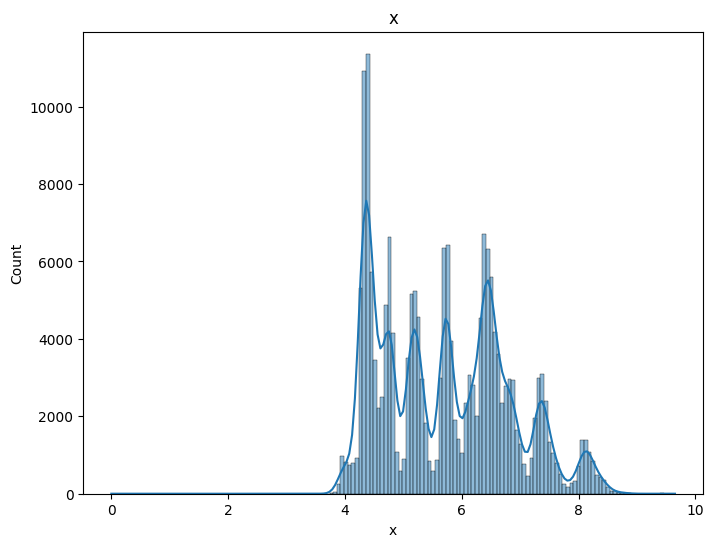

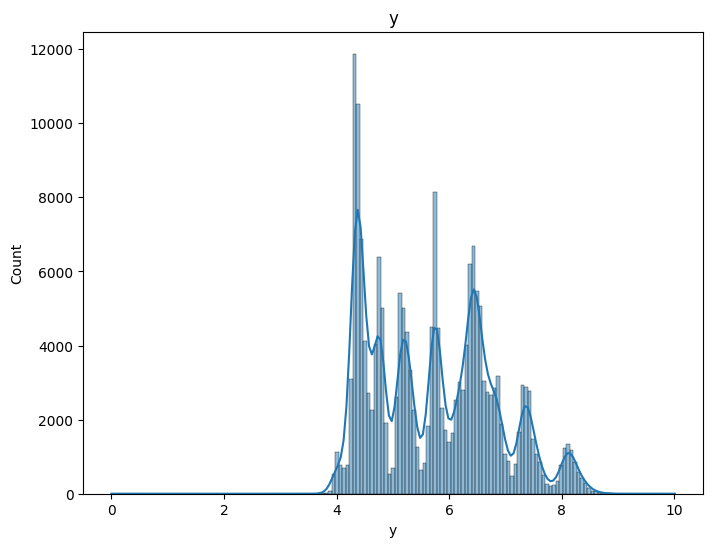

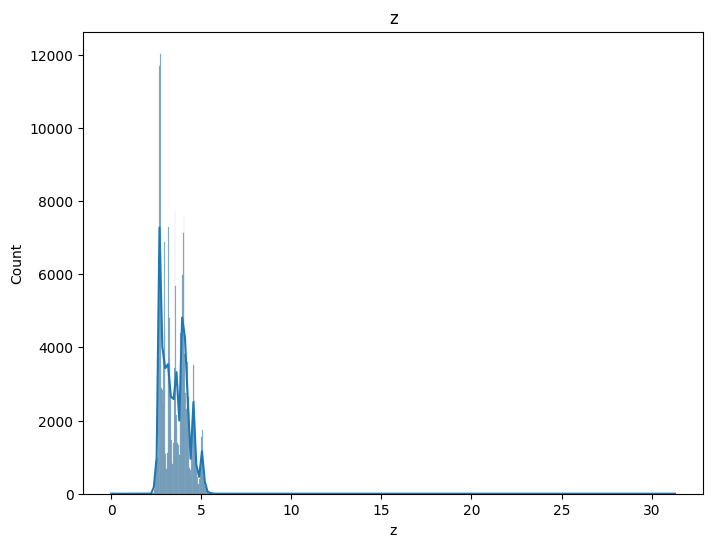

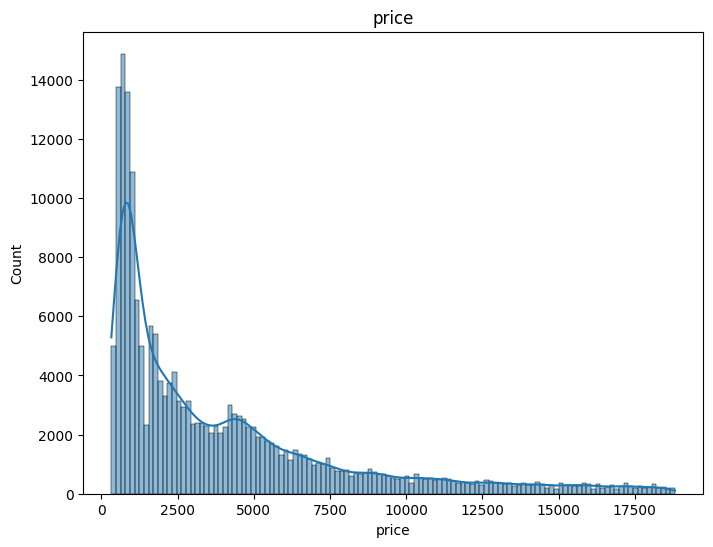

In [37]:
# Plotting the histplots
for i in num_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data = df, x = i, kde = True)
    plt.title(i)
    print('\n')
    plt.show()


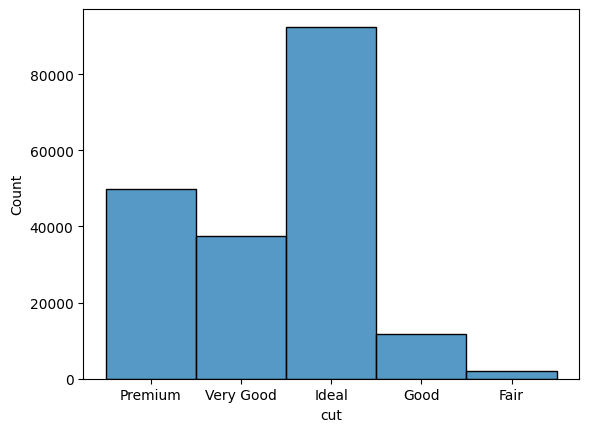

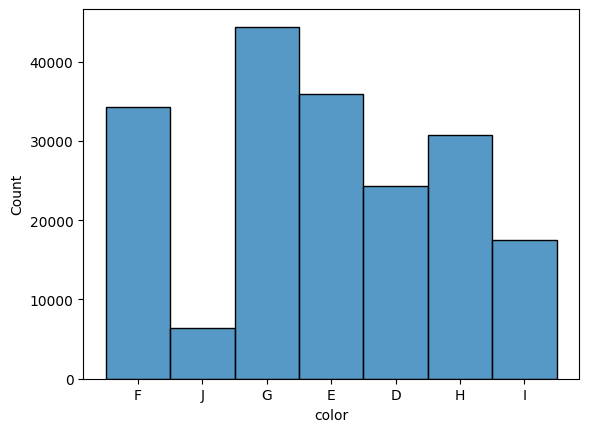

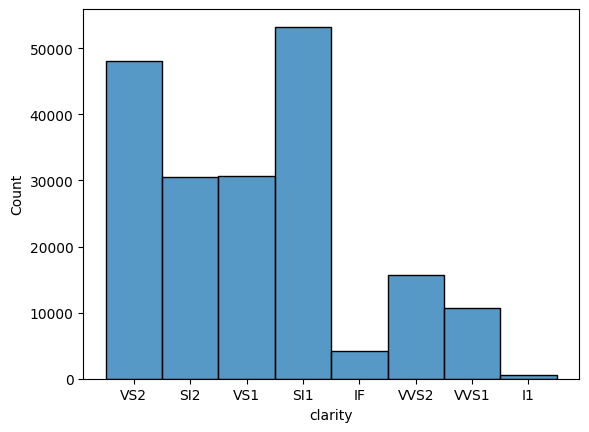

In [49]:
# Plotting the histplots
for i in cat_columns:
    sns.histplot(data = df, x = i)
    print('\n')
    plt.show()


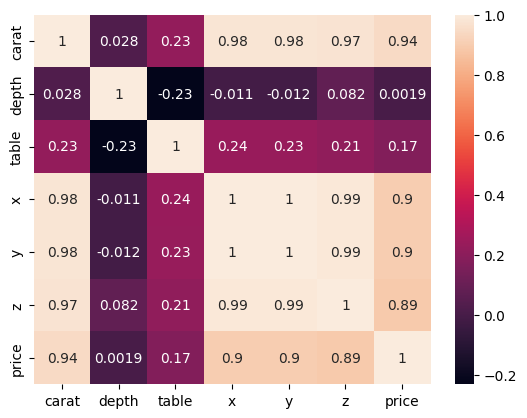

In [51]:
# Correlation
sns.heatmap(df[num_columns].corr(), annot = True)
plt.show()

x y, z are highly correlated to each other

In [53]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [56]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [57]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [66]:
ode_cut = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
ode_clarity = OrdinalEncoder(categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
ode_color = OrdinalEncoder(categories = [['D', 'E', 'F', 'G', 'H', 'I', 'J']])

In [68]:
df['cut'] = ode_cut.fit_transform(df['cut'].values.reshape(-1, 1))

In [69]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3.0,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,2.0,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,4.0,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,4.0,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3.0,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [73]:

df['clarity'] = ode_clarity.fit_transform(df['clarity'].values.reshape(-1, 1))

In [72]:
df['color'].unique()

array([2., 6., 3., 1., 0., 4., 5.])

In [ ]:
df['color'] = ode_color.fit_transform(df['color'].values.reshape(-1, 1))

In [74]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3.0,2.0,3.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,2.0,6.0,1.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,4.0,3.0,4.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,4.0,3.0,4.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3.0,3.0,3.0,62.6,59.0,7.65,7.61,4.77,14453


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  float64
 2   color    193573 non-null  float64
 3   clarity  193573 non-null  float64
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 14.8 MB


In [77]:
df['cut'] = df['cut'] + 1
df['color'] = df['color'] + 1
df['clarity'] = df['clarity'] + 1

In [80]:
df[['color', 'cut', 'clarity']] = df[['color', 'cut', 'clarity']].astype(int)

In [81]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int32  
 2   color    193573 non-null  int32  
 3   clarity  193573 non-null  int32  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 12.6 MB


In [83]:
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,4.132152,3.516157,3.975084,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,0.994157,1.623091,1.501776,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,1.000000,1.000000,1.000000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,3.000000,2.000000,3.000000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,4.000000,4.000000,4.000000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,5.000000,5.000000,5.000000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,5.000000,7.000000,8.000000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [89]:
# Creating pickle files of OrdinalEncoding for future use
with open('E:\Python_Models\Diamond_Price_Prediction\pickles\ode_cut.pkl', 'wb') as file_obj:
    pickle.dump(ode_cut, file_obj)

with open('E:\Python_Models\Diamond_Price_Prediction\pickles\ode_color.pkl', 'wb') as file_obj:
    pickle.dump(ode_color, file_obj)

with open('E:\Python_Models\Diamond_Price_Prediction\pickles\ode_clarity.pkl', 'wb') as file_obj:
    pickle.dump(ode_clarity, file_obj)